In [4]:
import importlib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import metricas_plots

In [5]:
importlib.reload(metricas_plots)
from metricas_plots import PlotsMetricas
p = PlotsMetricas()

### DataPrep inicial

In [6]:
dados_raw = pd.read_csv("dados/ariel_limpo.csv.gz", compression="gzip")
print(dados_raw.shape)

(137724, 20)


In [7]:
dados_limpos = dados_raw.dropna()
print(dados_limpos.columns, "\n", dados_limpos.shape)

Index(['fileid', 'RA', 'Dec', 'z', 'atflux', 'atmass', 'aZflux', 'aZmass',
       'mass_log10', 'Av', 'oiii_5007_ew', 'oiii_5007_ew_err', 'nii_6584_ew',
       'nii_6584_ew_err', 'oii_3727_ew', 'oii_3727_ew_err', 'halpha_ew',
       'halpha_ew_err', 'hbeta_ew', 'hbeta_ew_err'],
      dtype='str') 
 (135862, 20)


### Tratando linhas sem medição

In [8]:
print(dados_limpos.shape)
print(len(dados_limpos.loc[(dados_limpos["nii_6584_ew"] <= 0) | (dados_limpos["oiii_5007_ew"] <= 0) | 
                           (dados_limpos["halpha_ew"] <= 0)   | (dados_limpos["hbeta_ew"] <= 0)]))
print(len(dados_limpos.loc[(dados_limpos["nii_6584_ew"] > 0) & (dados_limpos["oiii_5007_ew"] > 0) & 
                           (dados_limpos["halpha_ew"] > 0) & (dados_limpos["hbeta_ew"] > 0)]))

(135862, 20)
9191
126671


In [9]:
linhas = ['nii_6584_ew', 'halpha_ew', 'oiii_5007_ew', 'hbeta_ew']

def plot_corr(correlacoes, ax, title):
    mask = np.triu(np.ones_like(correlacoes, dtype=bool), k=1) # triu debaixo, tril acima
    sns.heatmap(correlacoes, mask=mask, ax=ax,
                annot = True, fmt = '.3f',
                square=True, linewidths=0.5,
                vmin=0, vmax=1, cmap='coolwarm')
    ax.set_xticklabels([l.replace('_log10', '') for l in linhas], rotation=-15)
    ax.set_yticklabels([l.replace('_log10', '') for l in linhas], rotation=45)
    ax.set_title(title)

dados_limpos["oiii_5007_ew_miss"] = np.where(dados_limpos['oiii_5007_ew'] < 0, 1, 0)
dados_limpos["nii_6584_ew_miss"] = np.where(dados_limpos['nii_6584_ew'] < 0, 1, 0)
dados_limpos["halpha_ew_miss"] = np.where(dados_limpos['halpha_ew'] < 0, 1, 0)
dados_limpos["hbeta_ew_miss"] = np.where(dados_limpos['hbeta_ew'] < 0, 1, 0)
dados_limpos.tail()

,fileid,RA,Dec,z,atflux,atmass,aZflux,aZmass,mass_log10,Av,...,oii_3727_ew,oii_3727_ew_err,halpha_ew,halpha_ew_err,hbeta_ew,hbeta_ew_err,oiii_5007_ew_miss,nii_6584_ew_miss,halpha_ew_miss,hbeta_ew_miss
137719,22735370992,127.255827,17.706104,0.088792,9.518579,9.767818,-0.460162,-0.148713,9.834210,0.4468,...,5.380,0.775,8.572000,0.301,1.928,0.220,0,0,0,0
137720,227153726640,126.770680,17.736030,0.057688,9.141241,9.834117,-0.118837,-0.359741,9.044979,0.1756,...,32.376,2.287,29.541000,0.726,6.812,0.417,0,0,0,0
137721,22735370953,127.439092,17.763240,0.056286,8.572157,9.170356,-0.712194,-1.087279,9.089071,0.6900,...,42.600,2.260,67.269997,0.975,11.973,0.222,0,0,0,0
137722,227353709178,126.768430,17.795689,0.055959,9.038992,9.227427,-0.431030,-0.233626,9.418041,0.8138,...,4.279,0.508,10.936000,0.248,2.521,0.136,0,0,0,0
137723,227353709144,126.898010,17.918511,0.059016,9.886442,10.001024,-0.528954,-0.094116,10.304822,0.5137,...,6.975,0.527,14.962000,0.512,2.613,0.130,0,0,0,0


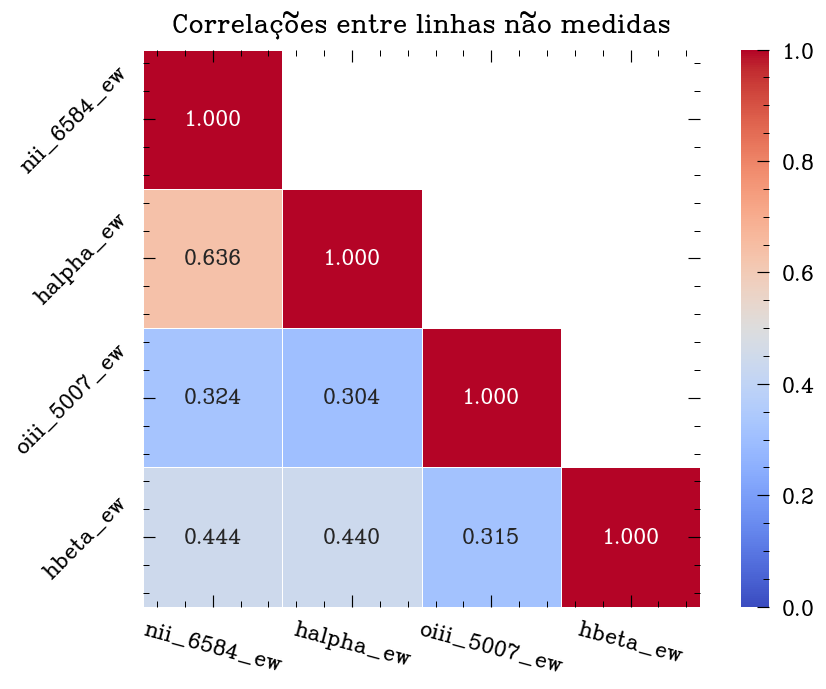

In [10]:
correlacoes = dados_limpos.loc[:, [l+"_miss" for l in linhas]].corr()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_corr(correlacoes, ax, 'Correlações entre linhas não medidas')
plt.tight_layout()
plt.show()

In [11]:
dados = dados_limpos.loc[(dados_limpos["nii_6584_ew"] > 0) & (dados_limpos["oiii_5007_ew"] > 0) & 
                         (dados_limpos["halpha_ew"] > 0) & (dados_limpos["hbeta_ew"] > 0)].copy()
print(dados.shape)

(126671, 24)


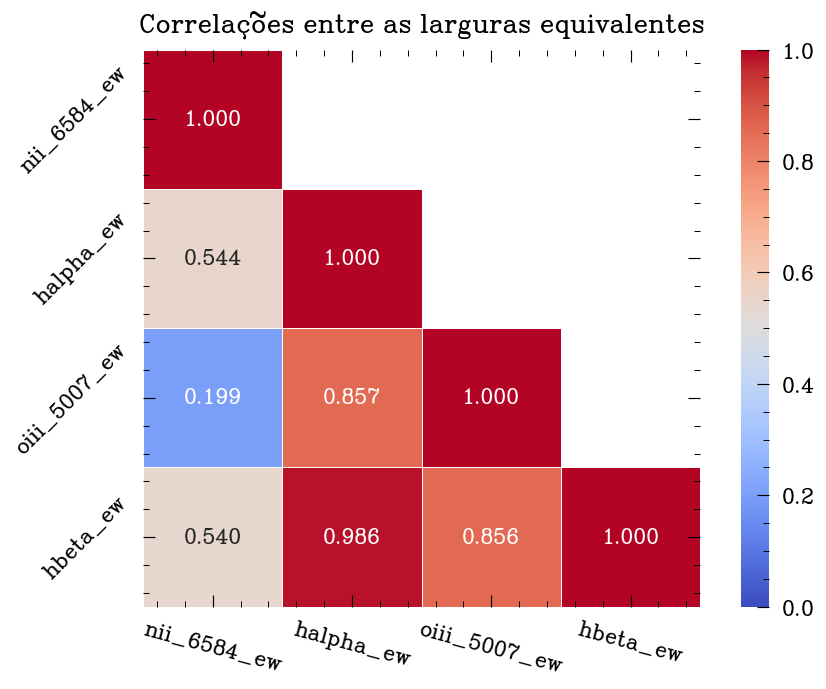

In [12]:
correlacoes = dados.loc[:, linhas].corr()
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
plot_corr(correlacoes, ax, 'Correlações entre as larguras equivalentes')
plt.tight_layout()
plt.show()

### Criando colunas com log10

In [13]:
dados["oii_3727_ew_log10"] = np.log10(dados["oii_3727_ew"])
dados["oiii_5007_ew_log10"] = np.log10(dados["oiii_5007_ew"])
dados["nii_6584_ew_log10"] = np.log10(dados["nii_6584_ew"])
dados["halpha_ew_log10"] = np.log10(dados["halpha_ew"])
dados["hbeta_ew_log10"] = np.log10(dados["hbeta_ew"])

dados["nii_halpha_log10"] = dados["nii_6584_ew_log10"] - dados["halpha_ew_log10"]
dados["oiii_hbeta_log10"] = dados["oiii_5007_ew_log10"] - dados["hbeta_ew_log10"]

In [14]:
print(dados.shape)
print(dados.dropna().shape)

(126671, 31)
(119425, 31)


In [16]:
#dados.to_csv("dados/ariel_limpo_log10.csv.gz", compression="gzip", index=False)
dados = pd.read_csv("dados/ariel_limpo_log10.csv.gz", compression="gzip")
print(dados.shape)

(126671, 27)
